# Train MLP

In [1]:
import cv2
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import pickle as pkl

from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier#
from sklearn.model_selection import learning_curve

### 1) Load Data

In [2]:
# load SIFT data
with open('../CW_Dataset/SIFT/hist_array_train.pkl', 'rb') as f:
    X_train = pkl.load(f)

with open('../CW_Dataset/SIFT/hist_array_test.pkl', 'rb') as f:
    X_test = pkl.load(f)

with open('../CW_Dataset/SIFT/hist_label_train.pkl', 'rb') as f:
    y_train = pkl.load(f)

with open('../CW_Dataset/SIFT/hist_label_test.pkl', 'rb') as f:
    y_test = pkl.load(f)


### 2) Gridsearch for MLP

In [3]:
# Create gridsearch for MLP
param_grid = {
    'hidden_layer_sizes': [(16,8), (32,16), (64,16), (128,32)],
    'learning_rate_init': [0.0001, 0.001]
}

MLP = MLPClassifier(
    solver='adam',
    alpha=1e-5,
    learning_rate='adaptive',
    max_iter=3000,
    early_stopping=True,
    n_iter_no_change=100,
    )

grid = GridSearchCV(MLP, param_grid, cv=3, scoring='f1_micro', verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

# print best parameters
print('Best parameters: {}'.format(grid.best_params_))

c:\Users\sdien\Anaconda3\envs\NC\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sdien\Anaconda3\envs\NC\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sdien\Anaconda3\envs\NC\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sdien\Anaconda3\envs\NC\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sdien\Anaconda3\envs\NC\lib

Best parameters: {'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.0001}


In [7]:
#clf = grid.best_estimator_

In [23]:
# retrain model with best parameters
clf = MLPClassifier(
    solver='adam',
    alpha=1e-5,
    learning_rate='adaptive',
    max_iter=3000,
    early_stopping=True,
    n_iter_no_change=100,
    validation_fraction=0.2,
    hidden_layer_sizes=grid.best_params_['hidden_layer_sizes'],
    learning_rate_init=grid.best_params_['learning_rate_init'],
)

clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(32, 16),
              learning_rate='adaptive', learning_rate_init=0.0001,
              max_iter=3000, n_iter_no_change=100, validation_fraction=0.2)

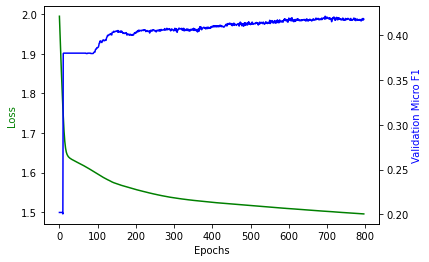

In [24]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(clf.loss_curve_, 'g-')
ax2.plot(clf.validation_scores_, 'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Validation Micro F1', color='b')

plt.show()

In [25]:
# save best model
with open('../Models/sift-MLP.pkl', 'wb') as f:
    pkl.dump(grid.best_estimator_, f)

### 3) Test MLP

In [26]:
# load best model
with open('../Models/sift-MLP.pkl', 'rb') as f:
    clf = pkl.load(f)

In [27]:
# evaluate model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.36      0.15      0.21       329
           2       0.00      0.00      0.00        74
           3       0.00      0.00      0.00       160
           4       0.44      0.82      0.57      1185
           5       0.29      0.09      0.14       478
           6       0.00      0.00      0.00       162
           7       0.34      0.28      0.31       680

    accuracy                           0.41      3068
   macro avg       0.20      0.19      0.18      3068
weighted avg       0.33      0.41      0.33      3068



c:\Users\sdien\Anaconda3\envs\NC\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sdien\Anaconda3\envs\NC\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sdien\Anaconda3\envs\NC\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# create confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n{}'.format(confusion_matrix))


Confusion matrix: 
[[ 48   0   0 212  17   0  52]
 [  0   0   0  56   4   0  14]
 [  3   0   0 114   8   0  35]
 [ 30   0   0 977  35   0 143]
 [ 11   0   0 321  43   0 103]
 [  5   0   0 112  12   0  33]
 [ 36   0   0 424  27   0 193]]
